In [9]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from datetime import datetime

from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [11]:
data = pd.read_csv('C:/Users/sid31/Downloads/UCI HAR Dataset/data.csv')

In [14]:
# Randomize order of rows in data frame.
shuffled_index = np.random.permutation(data.index)
rand_df = data.reindex(shuffled_index)

# Divide number of rows in half and round.
last_train_row = int(data.shape[0] * 0.7)

# Select the first half and set as training set.
# Select the second half and set as test set.
train = rand_df.iloc[0:last_train_row]
test= rand_df.iloc[last_train_row:]

In [15]:
train.shape

(5146, 563)

In [17]:
train.head()

,tBodyAcc.mean...X,tBodyAcc.mean...Y,tBodyAcc.mean...Z,tBodyAcc.std...X,tBodyAcc.std...Y,tBodyAcc.std...Z,tBodyAcc.mad...X,tBodyAcc.mad...Y,tBodyAcc.mad...Z,tBodyAcc.max...X,...,fBodyBodyGyroJerkMag.kurtosis..,angle.tBodyAccMean.gravity.,angle.tBodyAccJerkMean..gravityMean.,angle.tBodyGyroMean.gravityMean.,angle.tBodyGyroJerkMean.gravityMean.,angle.X.gravityMean.,angle.Y.gravityMean.,angle.Z.gravityMean.,subject,Activity
4193,0.268578,-0.021116,-0.124572,-0.990326,-0.974215,-0.957620,-0.991993,-0.975684,-0.956445,-0.940451,...,-0.910304,0.005479,-0.677574,-0.383913,-0.487703,-0.612846,0.323347,0.162976,21,STANDING
2834,0.383570,0.025769,-0.172968,0.304085,0.205996,-0.276731,0.245356,0.052723,-0.341187,0.530718,...,-0.823328,-0.297749,0.275102,0.949862,-0.618296,-0.848994,0.196522,-0.018631,15,WALKING_DOWNSTAIRS
4332,0.262955,0.010117,-0.031551,0.187343,0.199283,0.024492,0.145770,0.144106,-0.012666,0.532281,...,-0.400709,0.267329,-0.806729,0.525317,-0.547566,-0.633226,0.319721,0.141660,21,WALKING_DOWNSTAIRS
515,0.294070,-0.075006,-0.101012,-0.103585,0.184900,-0.385653,-0.121216,0.094563,-0.375842,-0.130437,...,-0.554810,-0.287997,0.805482,-0.558724,-0.908048,-0.604065,0.350650,0.122592,3,WALKING_UPSTAIRS
3012,0.364229,-0.018834,-0.187562,0.150627,-0.043979,0.029321,0.131523,-0.116836,0.018560,0.419559,...,-0.299023,-0.537418,0.805600,-0.028690,-0.827011,-0.678065,0.226987,0.205007,16,WALKING_DOWNSTAIRS


In [16]:
test.shape

(2206, 563)

Not normalising the data, the data itself is adjusted to scaling.

In [20]:
X_train = train.drop(['subject', 'Activity'], axis=1)
y_train = train.Activity

X_test = test.drop(['subject', 'Activity'], axis=1)
y_test = test.Activity

print('X_train and y_train : ({},{})'.format(X_train.shape, y_train.shape))
print('X_test  and y_test  : ({},{})'.format(X_test.shape, y_test.shape))

X_train and y_train : ((5146, 561),(5146,))
X_test  and y_test  : ((2206, 561),(2206,))


In [21]:
labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']

# plot for confusion matrix

In [23]:
plt.rcParams["font.family"] = 'DejaVu Sans'

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [24]:
from datetime import datetime
def perform_model(model, X_train, y_train, X_test, y_test, class_labels, cm_normalize=True, \
                 print_cm=True, cm_cmap=plt.cm.Greens):
    
    
    # to store results at various phases
    results = dict()
    
    # time at which model starts training 
    train_start_time = datetime.now()
    print('training the model..')
    model.fit(X_train, y_train)
    print('Done....!\n')
    train_end_time = datetime.now()
    results['training_time'] =  train_end_time - train_start_time
    print('==> training time:- {}\n'.format(results['training_time']))
    
    
    # predict test data
    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    print('Done....!\n')
    results['testing_time'] = test_end_time - test_start_time
    print('==> testing time:- {}\n'.format(results['testing_time']))
    results['predicted'] = y_pred
   

    # calculate overall accuracty of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('==> Accuracy:- {}\n'.format(accuracy))
   
    
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm: 
        print('\n ********Confusion Matrix********')
        print('\n {}'.format(cm))
        
    # plot confusin matrix
    plt.figure(figsize=(6,6))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix', cmap = cm_cmap)
    plt.show()
    
    # get classification report
    print('****************| Classifiction Report |****************')
    classification_report = metrics.classification_report(y_test, y_pred)
   
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)
    
    # add the trained  model to the results
    results['model'] = model
    
    return results

In [25]:
def print_grid_search_attributes(model):
    # Estimator that gave highest score among all the estimators formed in GridSearch
    print('\n\n==> Best Estimator:')
    print('\t{}\n'.format(model.best_estimator_))


    # parameters that gave best results while performing grid search
    print('\n==> Best parameters:')
    print('\tParameters of best estimator : {}'.format(model.best_params_))


    #  number of cross validation splits
    print('\n==> No. of CrossValidation sets:')
    print('\tTotal numbre of cross validation sets: {}'.format(model.n_splits_))


    # Average cross validated score of the best estimator, from the Grid Search 
    print('\n==> Best Score:')
    print('\tAverage Cross Validate scores of best estimator : {}'.format(model.best_score_))

    

# Logistic Regression

training the model..
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Done....!

==> training time:- 0:00:08.348168

Predicting test data
Done....!

==> testing time:- 0:00:00.006999

==> Accuracy:- 0.9841341795104261


 ********Confusion Matrix********

 [[430   0   0   0   0   0]
 [  0 380   9   0   0   0]
 [  0  15 386   0   0   0]
 [  0   0   0 353   1   1]
 [  0   0   0   2 312   1]
 [  0   0   0   6   0 310]]


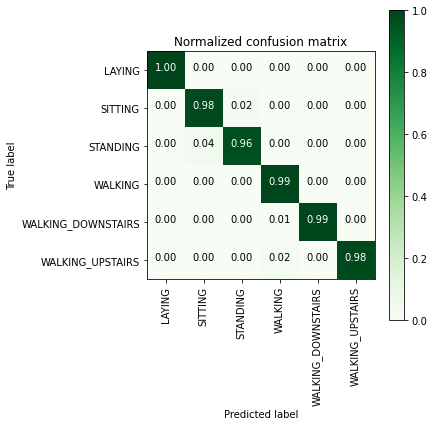

****************| Classifiction Report |****************
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       430
           SITTING       0.96      0.98      0.97       389
          STANDING       0.98      0.96      0.97       401
           WALKING       0.98      0.99      0.99       355
WALKING_DOWNSTAIRS       1.00      0.99      0.99       315
  WALKING_UPSTAIRS       0.99      0.98      0.99       316

          accuracy                           0.98      2206
         macro avg       0.98      0.98      0.98      2206
      weighted avg       0.98      0.98      0.98      2206



==> Best Estimator:
	LogisticRegression(C=10)


==> Best parameters:
	Parameters of best estimator : {'C': 10, 'penalty': 'l2'}

==> No. of CrossValidation sets:
	Total numbre of cross validation sets: 3

==> Best Score:
	Average Cross Validate scores of best estimator : 0.9780414596741128


In [26]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=ConvergenceWarning)

# start Grid search
parameters = {'C':[0.01, 0.1, 1, 10, 20, 30], 'penalty':['l2','l1']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)
log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)

# observe the attributes of the model 
print_grid_search_attributes(log_reg_grid_results['model'])

# Linear Support Vectore Classifier

training the model..
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Done....!

==> training time:- 0:00:16.606582

Predicting test data
Done....!

==> testing time:- 0:00:00.005839

==> Accuracy:- 0.9873073436083409


 ********Confusion Matrix********

 [[430   0   0   0   0   0]
 [  1 379   9   0   0   0]
 [  0  17 384   0   0   0]
 [  0   0   0 355   0   0]
 [  0   0   0   0 315   0]
 [  0   0   0   1   0 315]]


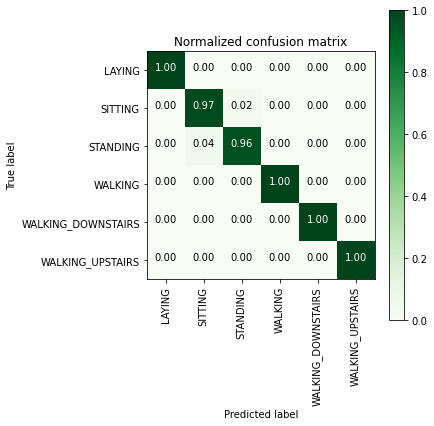

****************| Classifiction Report |****************
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       430
           SITTING       0.96      0.97      0.97       389
          STANDING       0.98      0.96      0.97       401
           WALKING       1.00      1.00      1.00       355
WALKING_DOWNSTAIRS       1.00      1.00      1.00       315
  WALKING_UPSTAIRS       1.00      1.00      1.00       316

          accuracy                           0.99      2206
         macro avg       0.99      0.99      0.99      2206
      weighted avg       0.99      0.99      0.99      2206



==> Best Estimator:
	LinearSVC(C=0.5, tol=5e-05)


==> Best parameters:
	Parameters of best estimator : {'C': 0.5}

==> No. of CrossValidation sets:
	Total numbre of cross validation sets: 5

==> Best Score:
	Average Cross Validate scores of best estimator : 0.9836759225187995


In [27]:
parameters = {'C':[0.125, 0.5, 1, 2, 8, 16]}
lr_svc = LinearSVC(tol=0.00005)
lr_svc_grid = GridSearchCV(lr_svc, param_grid=parameters, n_jobs=-1, verbose=1)
lr_svc_grid_results = perform_model(lr_svc_grid, X_train, y_train, X_test, y_test, class_labels=labels)

# observe the attributes of the model 
print_grid_search_attributes(lr_svc_grid_results['model'])

# Radial Basis Function - SVM

training the model..
Done....!

==> training time:- 0:01:45.540340

Predicting test data
Done....!

==> testing time:- 0:00:00.654559

==> Accuracy:- 0.9932003626473255


 ********Confusion Matrix********

 [[430   0   0   0   0   0]
 [  0 382   7   0   0   0]
 [  0   8 393   0   0   0]
 [  0   0   0 355   0   0]
 [  0   0   0   0 315   0]
 [  0   0   0   0   0 316]]


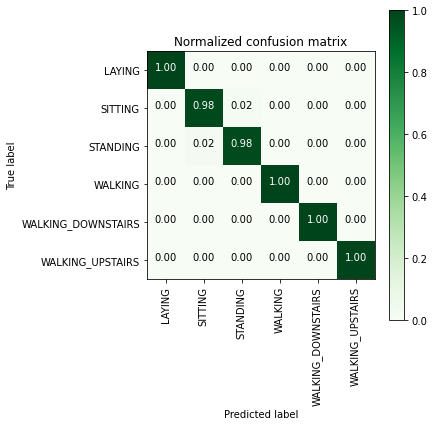

****************| Classifiction Report |****************
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       430
           SITTING       0.98      0.98      0.98       389
          STANDING       0.98      0.98      0.98       401
           WALKING       1.00      1.00      1.00       355
WALKING_DOWNSTAIRS       1.00      1.00      1.00       315
  WALKING_UPSTAIRS       1.00      1.00      1.00       316

          accuracy                           0.99      2206
         macro avg       0.99      0.99      0.99      2206
      weighted avg       0.99      0.99      0.99      2206



==> Best Estimator:
	SVC(C=16, gamma=0.0078125)


==> Best parameters:
	Parameters of best estimator : {'C': 16, 'gamma': 0.0078125}

==> No. of CrossValidation sets:
	Total numbre of cross validation sets: 5

==> Best Score:
	Average Cross Validate scores of best estimator : 0.9858142979799409


In [28]:
parameters = {'C':[2,8,16],\
              'gamma': [ 0.0078125, 0.125, 2]}
rbf_svm = SVC(kernel='rbf')
rbf_svm_grid = GridSearchCV(rbf_svm,param_grid=parameters, n_jobs=-1)
rbf_svm_grid_results = perform_model(rbf_svm_grid, X_train, y_train, X_test, y_test, class_labels=labels)

# observe the attributes of the model 
print_grid_search_attributes(rbf_svm_grid_results['model'])

# Decision Tree Classifier

training the model..
Done....!

==> training time:- 0:00:03.701225

Predicting test data
Done....!

==> testing time:- 0:00:00.005001

==> Accuracy:- 0.9356300997280145


 ********Confusion Matrix********

 [[430   0   0   0   0   0]
 [  0 365  24   0   0   0]
 [  0  54 347   0   0   0]
 [  0   0   0 330  11  14]
 [  0   0   0   4 300  11]
 [  0   1   1  10  12 292]]


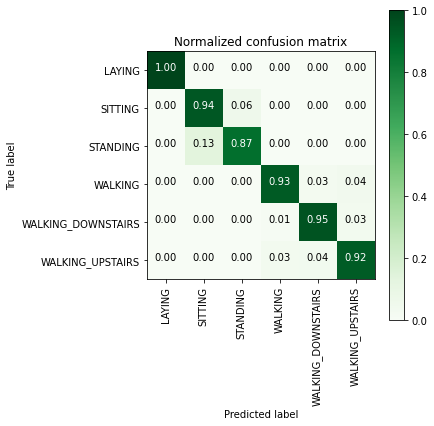

****************| Classifiction Report |****************
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       430
           SITTING       0.87      0.94      0.90       389
          STANDING       0.93      0.87      0.90       401
           WALKING       0.96      0.93      0.94       355
WALKING_DOWNSTAIRS       0.93      0.95      0.94       315
  WALKING_UPSTAIRS       0.92      0.92      0.92       316

          accuracy                           0.94      2206
         macro avg       0.94      0.93      0.93      2206
      weighted avg       0.94      0.94      0.94      2206



==> Best Estimator:
	DecisionTreeClassifier(max_depth=9)


==> Best parameters:
	Parameters of best estimator : {'max_depth': 9}

==> No. of CrossValidation sets:
	Total numbre of cross validation sets: 5

==> Best Score:
	Average Cross Validate scores of best estimator : 0.9315987809825733


In [29]:
parameters = {'max_depth':np.arange(3,10,2)}
dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt,param_grid=parameters, n_jobs=-1)
dt_grid_results = perform_model(dt_grid, X_train, y_train, X_test, y_test, class_labels=labels)

# observe the attributes of the model 
print_grid_search_attributes(dt_grid_results['model'])

# Random Forest Classifier

training the model..
Done....!

==> training time:- 0:01:46.077159

Predicting test data
Done....!

==> testing time:- 0:00:00.043998

==> Accuracy:- 0.9809610154125114


 ********Confusion Matrix********

 [[430   0   0   0   0   0]
 [  0 371  18   0   0   0]
 [  0  10 391   0   0   0]
 [  0   0   0 349   3   3]
 [  0   0   0   3 309   3]
 [  0   0   0   0   2 314]]


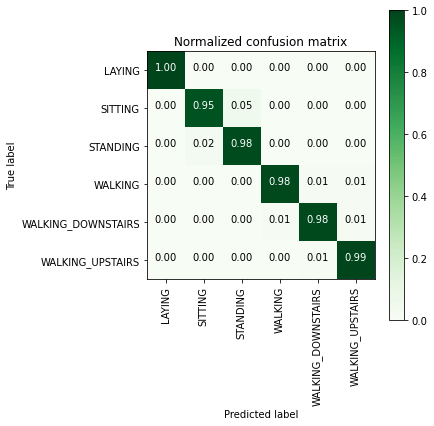

****************| Classifiction Report |****************
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       430
           SITTING       0.97      0.95      0.96       389
          STANDING       0.96      0.98      0.97       401
           WALKING       0.99      0.98      0.99       355
WALKING_DOWNSTAIRS       0.98      0.98      0.98       315
  WALKING_UPSTAIRS       0.98      0.99      0.99       316

          accuracy                           0.98      2206
         macro avg       0.98      0.98      0.98      2206
      weighted avg       0.98      0.98      0.98      2206



==> Best Estimator:
	RandomForestClassifier(max_depth=13, n_estimators=150)


==> Best parameters:
	Parameters of best estimator : {'max_depth': 13, 'n_estimators': 150}

==> No. of CrossValidation sets:
	Total numbre of cross validation sets: 5

==> Best Score:
	Average Cross Validate scores of best estimator : 0.9749329634766528


In [30]:
params = {'n_estimators': np.arange(10,201,20), 'max_depth':np.arange(3,15,2)}
rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc, param_grid=params, n_jobs=-1)
rfc_grid_results = perform_model(rfc_grid, X_train, y_train, X_test, y_test, class_labels=labels)

# observe the attributes of the model 
print_grid_search_attributes(rfc_grid_results['model'])

# Gradient Boosting - ensemble method

In [31]:
param_grid = {'max_depth': np.arange(5),'n_estimators':np.arange(140)}
gbdt = GradientBoostingClassifier()
gbdt_grid = GridSearchCV(gbdt, param_grid=param_grid, n_jobs=-1)
gbdt_grid_results = perform_model(gbdt_grid, X_train, y_train, X_test, y_test, class_labels=labels)

# observe the attributes of the model 
print_grid_search_attributes(gbdt_grid_results['model'])

training the model..


KeyboardInterrupt: 

# Comparing Models

In [32]:
print('\n                     Accuracy     Error')
print('                     ----------   --------')
print('Logistic Regression : {:.04}%       {:.04}%'.format(log_reg_grid_results['accuracy'] * 100,\
                                                  100-(log_reg_grid_results['accuracy'] * 100)))

print('Linear SVC          : {:.04}%       {:.04}% '.format(lr_svc_grid_results['accuracy'] * 100,\
                                                        100-(lr_svc_grid_results['accuracy'] * 100)))

print('rbf SVM classifier  : {:.04}%      {:.04}% '.format(rbf_svm_grid_results['accuracy'] * 100,\
                                                          100-(rbf_svm_grid_results['accuracy'] * 100)))

print('DecisionTree        : {:.04}%      {:.04}% '.format(dt_grid_results['accuracy'] * 100,\
                                                        100-(dt_grid_results['accuracy'] * 100)))

print('Random Forest       : {:.04}%      {:.04}% '.format(rfc_grid_results['accuracy'] * 100,\
                                                           100-(rfc_grid_results['accuracy'] * 100)))
#print('Gradient Boosting   : {:.04}%      {:.04}% '.format(gbdt_grid_results['accuracy'] * 100,\
     #                                                      100-(gbdt_grid_results['accuracy'] * 100)))


                     Accuracy     Error
                     ----------   --------
Logistic Regression : 98.41%       1.587%
Linear SVC          : 98.73%       1.269% 
rbf SVM classifier  : 99.32%      0.68% 
DecisionTree        : 93.56%      6.437% 
Random Forest       : 98.1%      1.904% 


All of the models performed very well, rbf svc outranked the other models with 99.32% accuracy 

I will try implimenting the algorithms with python from scratch and try comparing the results- only to check my understanding over the algorithms.

Gradient Boosting is taking time to complete the task with gridsearchcv, so i interrupted the kernal

I know accuracy isnt the right measure for some cases in classification, i will update the ipynb with ROC curves soon!